##TSN-E

O objetivo deste artigo não é ensinar como funciona o t-SNE (incorporação estocástica de vizinhos distribuída em t), mas como ele pode ser usado para ajudar na visualização de dados de alta dimensão. A ideia principal por trás do t-SNE é que ele tenta manter observações semelhantes próximas e observações diferentes separadas durante o processo de redução do número de dimensões. Vamos ver como esta técnica de redução de dimensionalidade pode nos ajudar a visualizar agrupamentos de observações semelhantes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

##Conjunto de dados
Para este exemplo, usaremos o conjunto de dados Fashion-MNIST. O conjunto de dados consiste em 70.000 imagens em tons de cinza (28x28) associadas a um rótulo de 10 classes diferentes.

In [2]:
# load dataset
data = datasets.fetch_openml(
    'Fashion-MNIST',
    version=1,
    return_X_y=True
)
# data returns a tuple (features, target)
features, target = data
target = target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Plotar uma imagem de amostra

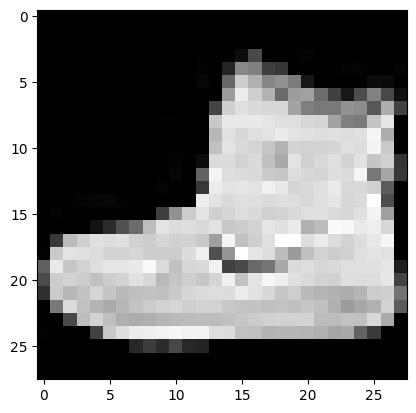

In [3]:
# reshape the features for plotting image
image = features.iloc[0].values.reshape(28, 28)
plt.imshow(image, cmap='gray')

##Aplicando t-SNE
Reduziremos a dimensionalidade dos recursos e utilizaremos o alvo para posterior identificação na plotagem final. Existem 784 recursos que representam cada pixel em uma imagem (28 x 28). A redução da dimensionalidade é útil neste caso. Basicamente, ao remover as variáveis ​​de destino, estaremos usando os recursos como um conjunto de dados não supervisionado.

Podemos reduzir os recursos para dois componentes usando t-SNE. (Observe que apenas as primeiras 30.000 linhas serão selecionadas para este exemplo)

In [4]:
# dimensionality reduction using t-SNE
tsne = manifold.TSNE(n_components=2, random_state=42)
# fit and transform
mnist_tr = tsne.fit_transform(features[:30000])
# transformed_data is a 2D numpy array of shape (30000, 2)

Para manipular melhor os dados e plotá-los usando Seaborn, vamos criar um dataframe usando os dados transformados e os alvos:

In [5]:
# create dataframe
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((mnist_tr,
                                            target.iloc[:30000])))
# cast targets column to int
cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.head()

,CP1,CP2,target
0,-44.081924,65.925591,9.0
1,61.260559,-59.758316,0.0
2,-0.741912,-24.796646,0.0
3,9.082579,-29.057386,3.0
4,1.743131,-52.152168,0.0


Agora podemos mapear os rótulos de destino para os itens reais que eles representam para plotagem:

In [6]:
clothes_map = {0:'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle Boot'}
# map targets to actual clothes for plotting
cps_df.loc[:, 'target'] = cps_df.target.map(clothes_map)

Vamos verificar a distribuição do recurso alvo:

<Axes: xlabel='target'>

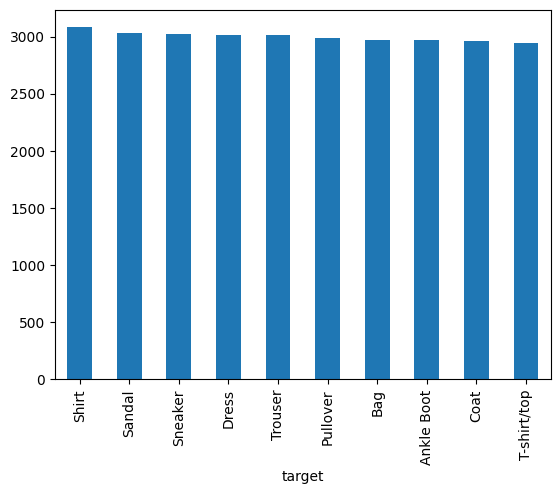

In [7]:
cps_df.target.value_counts().plot(kind='bar')

Conclusão
Finalmente, vamos representar graficamente os componentes e codificar por cores os alvos:

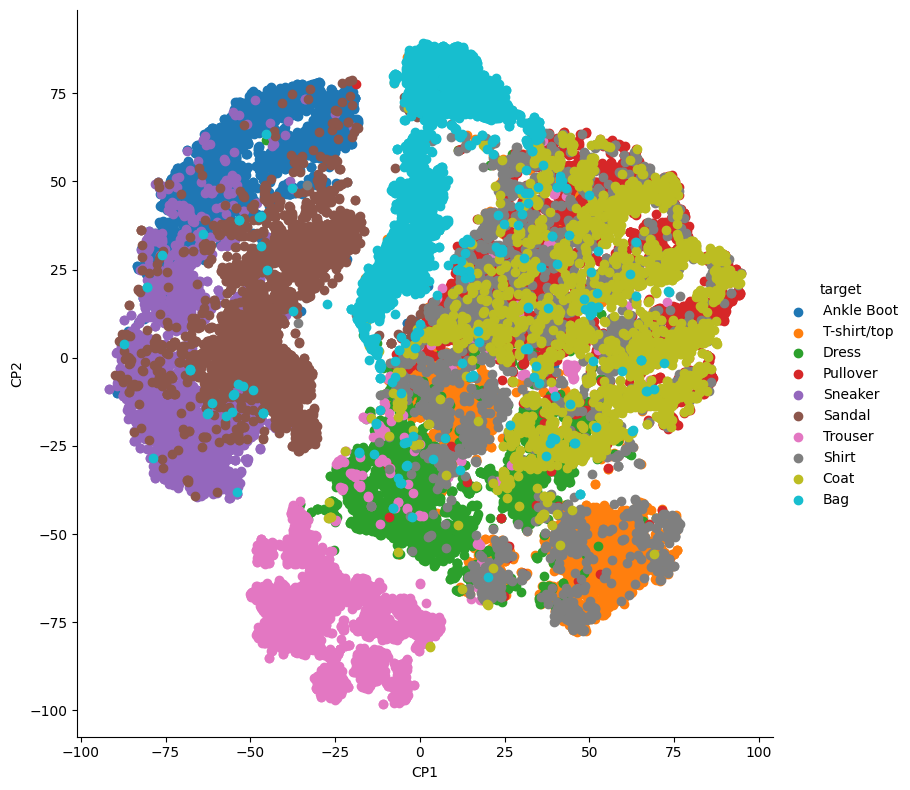

In [9]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.FacetGrid(cps_df, hue="target", height=8) # Use 'height' instead of 'size'
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()